In [6]:
!pip install imageio

In [8]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

--2020-11-29 14:50:11--  http://links.uwaterloo.ca/Repository/TIF/zelda.tif
Resolving links.uwaterloo.ca (links.uwaterloo.ca)... 129.97.140.120
Connecting to links.uwaterloo.ca (links.uwaterloo.ca)|129.97.140.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262274 (256K) [image/tiff]
Saving to: ‘zelda.tif.3’

zelda.tif.3         100%[===================>] 256.13K  1018KB/s    in 0.3s    

2020-11-29 14:50:11 (1018 KB/s) - ‘zelda.tif.3’ saved [262274/262274]



TiffPages: invalid page offset 219090958


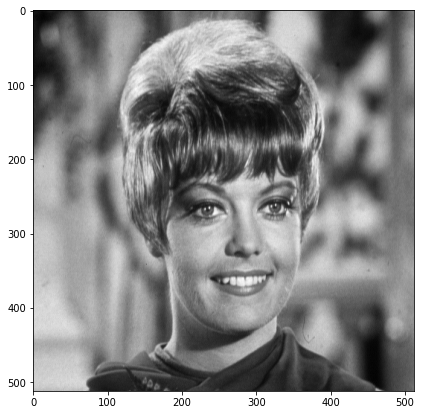

In [9]:
# im = misc.imread("einstein.tif").astype(float)
# im = misc.imread("house.tif").astype(float)
!wget http://links.uwaterloo.ca/Repository/TIF/zelda.tif
im = imageio.imread("zelda.tif").astype(float)
# im = misc.imread("barbara.png").astype(float)

f = plt.figure()
plt.imshow(im,cmap='gray')

In [18]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [19]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'An 8x8 DCT block')

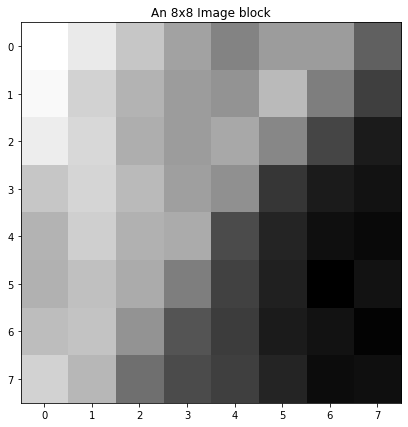

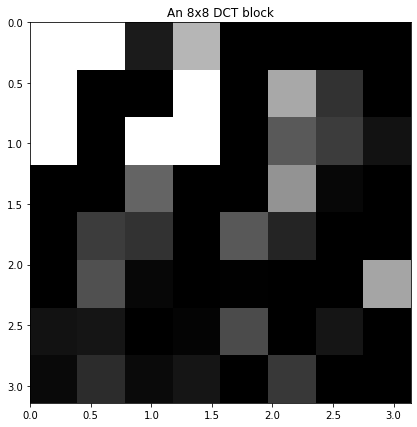

In [20]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, '8x8 DCTs of the image')

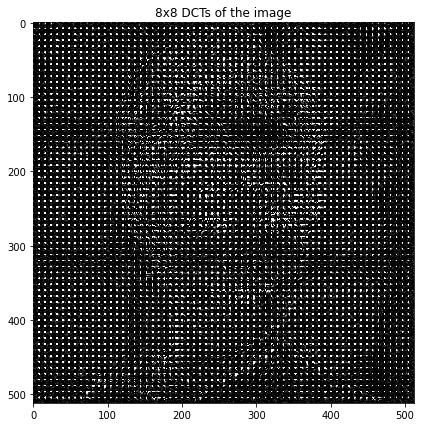

In [21]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 5.534744% of the DCT coefficients


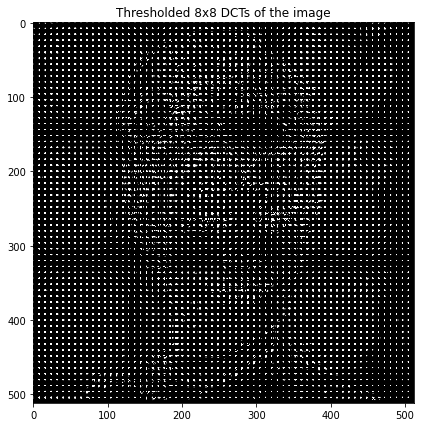

In [23]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

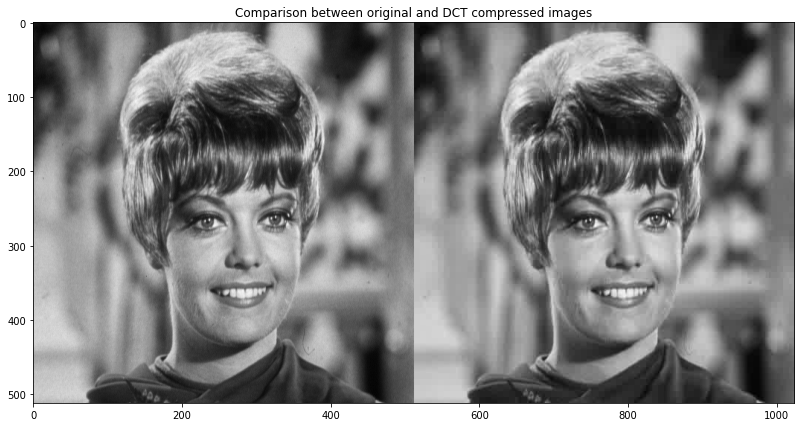

In [24]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )